In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
from pycaret.classification import *
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score

#this line is needed for matplotlib to show the histplot after df.hist
%matplotlib inline


warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
# setting views for pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# reading csv
df_in = pd.read_csv("../data/final.csv")

In [4]:
df_in

Unnamed: 0  rightankle  leftankle  rightknee  leftknee  righthip  lefthip  rightshoulder  leftshoulder  rightankle leftankle  rightankle rightknee  rightankle leftknee  rightankle righthip  rightankle lefthip  rightankle rightshoulder  rightankle leftshoulder  leftankle rightknee  leftankle leftknee  leftankle righthip  leftankle lefthip  leftankle rightshoulder  leftankle leftshoulder  rightknee leftknee  rightknee righthip  rightknee lefthip  rightknee rightshoulder  rightknee leftshoulder  leftknee righthip  leftknee lefthip  leftknee rightshoulder  leftknee leftshoulder  righthip lefthip  righthip rightshoulder  righthip leftshoulder  lefthip rightshoulder  lefthip leftshoulder  rightshoulder leftshoulder  curve
0             0      133.98     127.15     172.20    163.53    135.69   145.09          16.98          5.83            17035.5570            23071.3560           21909.7494           18179.7462          19439.1582                 2274.9804                 781.1034           21895.2300          20792.8395          17252.9835         18448.1935                2159.0070                741.2845          28159.8660          23365.8180         24984.4980                2923.9560               1003.9260         22189.3857        23726.5677               2776.7394               953.3799        19687.2621               2304.0162               791.0727              2463.6282              845.8747                     98.9934      1
1             1      163.77     170.90     166.09    169.52    145.64   155.28          17.55         54.36            27988.2930            27200.5593           27762.2904           23851.4628          25430.2056                 2874.1635                8902.5372           28384.7810          28970.9680          24889.8760         26537.3520                2999.2950               9290.1240          28155.5768          24189.3476         25790.4552                2914.8795               9028.6524         24688.8928        26323.0656               2975.0760              9215.1072        22614.9792               2555.9820              7916.9904              2725.1640             8441.0208                    954.0180      1
2             2      146.90     125.13     170.16    170.69    135.86   146.55          15.40         47.60            18381.5970            24996.5040           25074.3610           19957.8340          21528.1950                 2262.2600                6992.4400           21292.1208          21358.4397          17000.1618         18337.8015                1927.0020               5956.1880          29044.6104          23117.9376         24936.9480                2620.4640               8099.6160         23189.9434        25014.6195               2628.6260              8124.8440        19910.2830               2092.2440              6466.9360              2256.8700             6975.7800                    733.0400      1
3             3      158.59     155.23     176.81    169.58    137.37   161.93          45.66         96.25            24617.9257            28040.2979           26893.6922           21785.5083          25680.4787                 7241.2194               15264.2875           27446.2163          26323.9034          21323.9451         25136.3939                7087.8018              14940.8875          29983.4398          24288.3897         28630.8433                8073.1446              17017.9625         23295.2046        27460.0894               7743.0228             16322.0750        22244.3241               6272.3142             13221.8625              7393.7238            15585.7625                   4394.7750      1
4             4      149.31     157.42     160.25    157.07    135.32   142.02          14.47          1.47            23504.3802            23926.9275           23452.1217           20204.6292          21205.0062                 2160.5157                 219.4857           25226.5550          24725.9594          21302.0744         22356.7884      

In [5]:
# dropping unwanted column
df_in.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
# checking unwanted column
df_in

rightankle  leftankle  rightknee  leftknee  righthip  lefthip  rightshoulder  leftshoulder  rightankle leftankle  rightankle rightknee  rightankle leftknee  rightankle righthip  rightankle lefthip  rightankle rightshoulder  rightankle leftshoulder  leftankle rightknee  leftankle leftknee  leftankle righthip  leftankle lefthip  leftankle rightshoulder  leftankle leftshoulder  rightknee leftknee  rightknee righthip  rightknee lefthip  rightknee rightshoulder  rightknee leftshoulder  leftknee righthip  leftknee lefthip  leftknee rightshoulder  leftknee leftshoulder  righthip lefthip  righthip rightshoulder  righthip leftshoulder  lefthip rightshoulder  lefthip leftshoulder  rightshoulder leftshoulder  curve
0        133.98     127.15     172.20    163.53    135.69   145.09          16.98          5.83            17035.5570            23071.3560           21909.7494           18179.7462          19439.1582                 2274.9804                 781.1034           21895.2300          20792.8395          17252.9835         18448.1935                2159.0070                741.2845          28159.8660          23365.8180         24984.4980                2923.9560               1003.9260         22189.3857        23726.5677               2776.7394               953.3799        19687.2621               2304.0162               791.0727              2463.6282              845.8747                     98.9934      1
1        163.77     170.90     166.09    169.52    145.64   155.28          17.55         54.36            27988.2930            27200.5593           27762.2904           23851.4628          25430.2056                 2874.1635                8902.5372           28384.7810          28970.9680          24889.8760         26537.3520                2999.2950               9290.1240          28155.5768          24189.3476         25790.4552                2914.8795               9028.6524         24688.8928        26323.0656               2975.0760              9215.1072        22614.9792               2555.9820              7916.9904              2725.1640             8441.0208                    954.0180      1
2        146.90     125.13     170.16    170.69    135.86   146.55          15.40         47.60            18381.5970            24996.5040           25074.3610           19957.8340          21528.1950                 2262.2600                6992.4400           21292.1208          21358.4397          17000.1618         18337.8015                1927.0020               5956.1880          29044.6104          23117.9376         24936.9480                2620.4640               8099.6160         23189.9434        25014.6195               2628.6260              8124.8440        19910.2830               2092.2440              6466.9360              2256.8700             6975.7800                    733.0400      1
3        158.59     155.23     176.81    169.58    137.37   161.93          45.66         96.25            24617.9257            28040.2979           26893.6922           21785.5083          25680.4787                 7241.2194               15264.2875           27446.2163          26323.9034          21323.9451         25136.3939                7087.8018              14940.8875          29983.4398          24288.3897         28630.8433                8073.1446              17017.9625         23295.2046        27460.0894               7743.0228             16322.0750        22244.3241               6272.3142             13221.8625              7393.7238            15585.7625                   4394.7750      1
4        149.31     157.42     160.25    157.07    135.32   142.02          14.47          1.47            23504.3802            23926.9275           23452.1217           20204.6292          21205.0062                 2160.5157                 219.4857           25226.5550          24725.9594          21302.0744         22356.7884                2277.8674                231.4074          25170.4675         

In [7]:
df = df_in.copy()

## Baseline

In [8]:
df['curve'].value_counts(normalize = True)

1    0.577465
0    0.422535
Name: curve, dtype: float64

### The baseline value to surpass for prediction is 57%

# Modelling

# CAUTION CAUTION CAUTION CAUTION CAUTION CAUTION CAUTION


You have to manually press enter after running the next line of code as it requires user input for confirmation  
Otherwise the code will just get stuck awaiting your input

# CAUTION CAUTION CAUTION CAUTION CAUTION CAUTION CAUTION

In [9]:
# initializing pycaret
exp_clf101 = setup(data = df, target = 'curve', session_id=123)

In [10]:
# comparing best models for classification
# train data results
best_model = compare_models()

In [11]:
top3 = compare_models(n_select = 3)

In [12]:
# showing best model with hyperparameters
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


### Surprisingly, the extra trees classifier is able to find some kind of pattern, I am very surprised.
Even logreg is able to find some kind of pattern resulting in curved balls or not.

### Hyperparamater tuning with gridsearch on decision treees classifier

In [13]:
et_test = create_model('et', bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=True,
                     warm_start=False)

In [14]:
#creating just decision trees for checking
et = create_model('et')

In [15]:
# using gridsearch to tune hyperparameters for decision trees
tuned_et = tune_model(et)

Somehow using gridsearch lowers the accuracy scores

### The accuracy has dropped somewhat to 75.67% vs the original 82.89% and the non-gridsearched 78.78%, but still relatively high, and still beats the baseline.

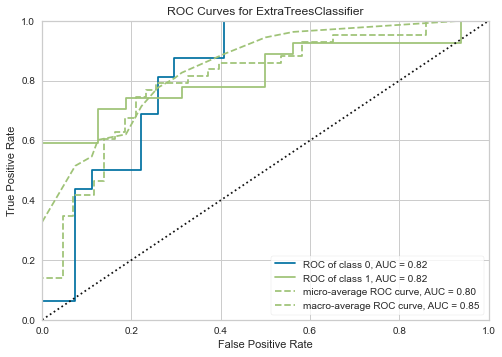

In [16]:
plot_model(tuned_et, plot = 'auc')

#### What is confusing is that the AUC is now different from when the model was initiated above.
#### It was 0.91 but now its 0.82

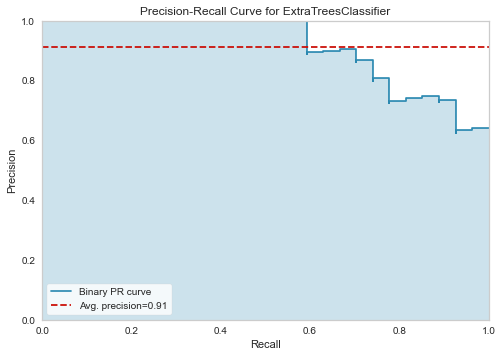

In [17]:
# plotting the precision recall curve
plot_model(tuned_et, plot = 'pr')

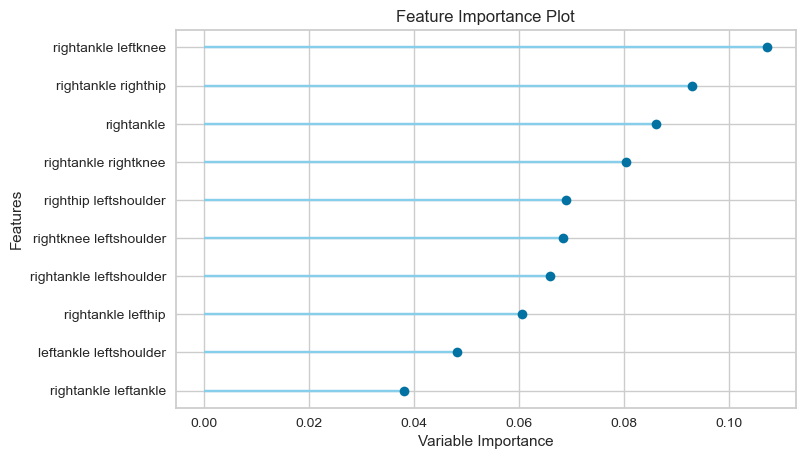

In [18]:
# plotting the most important features
# interestingly, it was a good idea to use polynomial features before modelling
# the left shoulder seems to have an effect on whether a player will be doing a curved shot
plot_model(tuned_et, plot='feature')

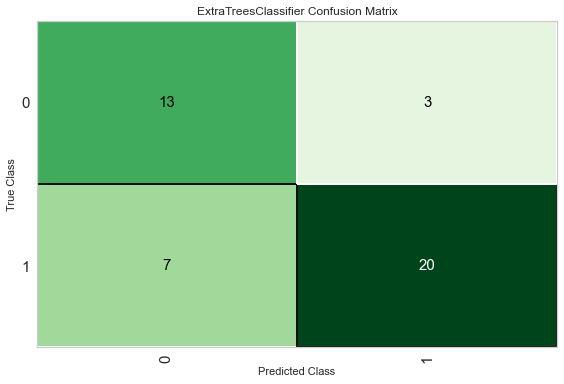

In [19]:
# plotting the confusion matrix
# false positives seem much lower than false negatives
plot_model(tuned_et, plot = 'confusion_matrix')

In [20]:
# predicting using the test set
predict_model(tuned_et);

The test set accuracy is now around 76.74% which shows overfitting as compared to train set 84%

### Now bagging for extra trees

In [21]:
# running bagged decision tree
bagged_et = ensemble_model(et)

In [22]:
# even increasing the estimators did not help in accuracy
# but it did increase other scores overall other than precision
bagged_et2 = ensemble_model(et, n_estimators=50)

In [23]:
# checking results for bagged ET
# test set
predict_model(bagged_et)

rightankle   leftankle   rightknee    leftknee    righthip     lefthip  rightankle leftankle  rightankle rightknee  rightankle leftknee  rightankle righthip  ...  leftknee lefthip  leftknee rightshoulder  righthip lefthip  righthip rightshoulder  righthip leftshoulder  lefthip rightshoulder  rightshoulder leftshoulder  curve  Label  Score
0   102.089996  131.229996  164.539993  167.350006  134.250000  146.179993          13397.270508          16797.888672         17084.761719         13705.582031  ...      24463.222656              851.811523      19624.664062              683.332520           10370.812500             744.056213                  393.202515      0      0  0.912
1   139.850006  140.970001  154.330002  139.619995  130.289993  130.529999          19714.654297          21583.050781         19525.857422         18221.056641  ...      18224.597656              727.420227      17006.753906              678.810913            4594.025391             680.061279                  183.704605      0      0  0.538
2   118.550003  137.389999  128.649994  140.399994  118.099998  136.610001          16287.584961          15251.457031         16644.419922         14000.754883  ...      19180.044922              419.795990      16133.640625              353.118988            6917.117188             408.463898                  175.124298      0      0  0.796
3   151.509995  151.520004  167.309998  161.929993  139.669998  143.449997          22956.794922          25349.138672         24534.013672         21161.402344  ...      23228.859375             1165.895996      20035.662109             1005.624023            5018.343262            1032.839966                  258.696014      1      1  0.816
4   138.330002  109.610001  159.309998  158.330002  140.919998  151.149994          15162.351562          22037.351562         21901.789062         19493.462891  ...      23931.580078             2740.692383      21300.058594             2439.325195            4785.643066            2616.406494                  587.847595      1      1  0.612
5   172.460007  169.949997  173.229996  179.520004  144.589996  163.850006          29309.576172          29875.246094         30960.019531         24935.992188  ...      29414.351562             2971.055908      23691.072266             2392.964600            5245.725098            2711.717529                  600.434021      1      1  0.504
6   164.160004  172.490005  178.610001  178.880005  155.449997  161.589996          28315.958984          29320.617188         29364.941406         25518.671875  ...      28905.218750             2137.615967      25119.166016             1857.627441           14161.495117            1931.000488                 1088.645020      0      0  0.655
7   168.460007  154.389999  160.970001  169.710007  137.500000  149.919998          26008.539062          27117.005859         28589.345703         23163.250000  ...      25442.923828             2350.483398      20614.000000             1904.375000            2740.375000            2076.392090                  276.030487      1      1  0.892
8   149.309998  157.419998  160.250000  157.070007  135.320007  142.020004          23504.380859          23926.927734         23452.121094         20204.628906  ...      22307.082031             2272.802979      19218.146484             1958.080444             198.920395            2055.029297                   21.270901      1      1  0.920
9   126.669998  148.270004  156.449997  152.630005  140.649994  148.880005          18781.361328          19817.521484         19333.642578         17816.134766  ...      22723.554688              793.676025      20939.972656              731.380005            1419.158447             774.176025                   52.467999      1      1  0.628
10  174.389999  178.089996  166.720001  179.289993  143.449997  161.190002          31057.115234          29074.300781         31266.382812         25016.246094  ...      28899.755859             2897.326416  

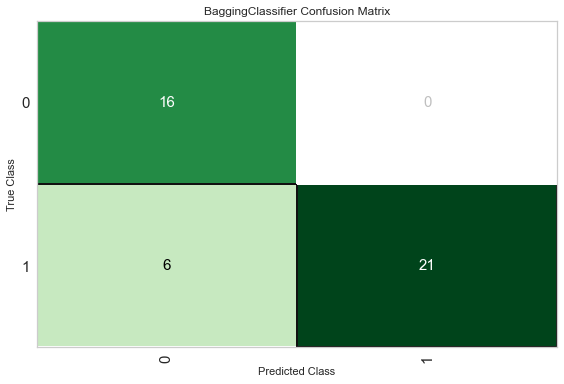

In [24]:
# plotting the confusion matrix
# false positives seem much lower than false negatives
plot_model(bagged_et, plot = 'confusion_matrix')

Unfortunately for bagged ET, coefficients could not be extracted.

In [25]:
# check the parameters of bagged_et
print(bagged_et)

BaggingClassifier(base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                      ccp_alpha=0.0,
                                                      class_weight=None,
                                                      criterion='gini',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                              

### Now boosting for extra trees

In [26]:
# Running boosted ET
# training results
boosted_et = ensemble_model(et, method = 'Boosting')

In [27]:
# even increasing the estimators did not help in improving any performance metrics
boosted_et2 = ensemble_model(et, method = 'Boosting', n_estimators=200)

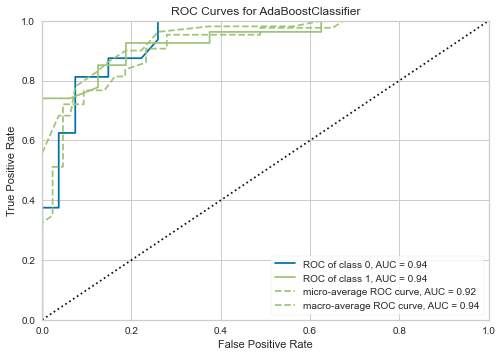

In [28]:
plot_model(boosted_et, plot = 'auc')

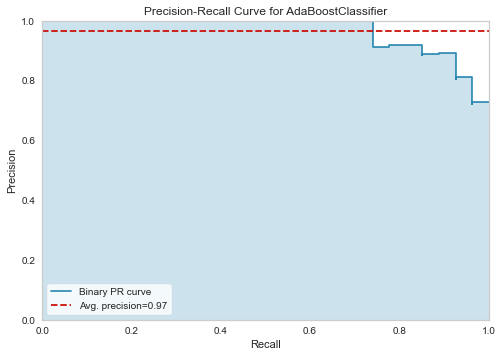

In [29]:
# plotting the precision recall curve
plot_model(boosted_et, plot = 'pr')

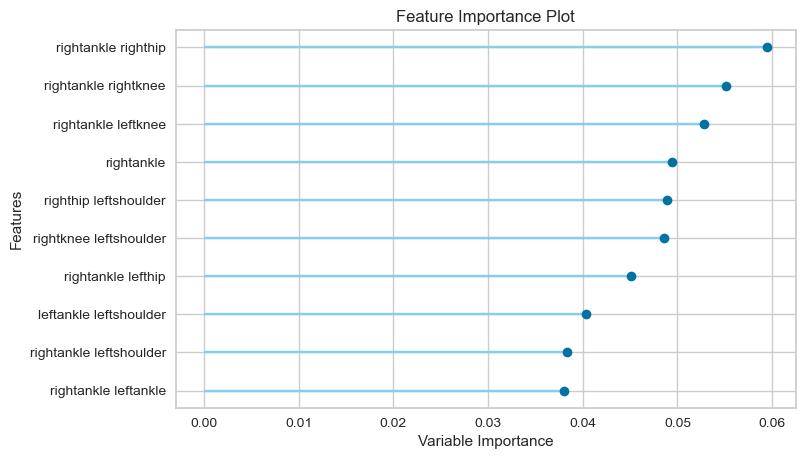

In [30]:
# plotting the most important features
# interestingly, it was a good idea to use polynomial features before modelling
# most of the features present were the polynomial, but the right ankle being in the top 4, 
#showed that it was the most important feature
plot_model(boosted_et, plot='feature')

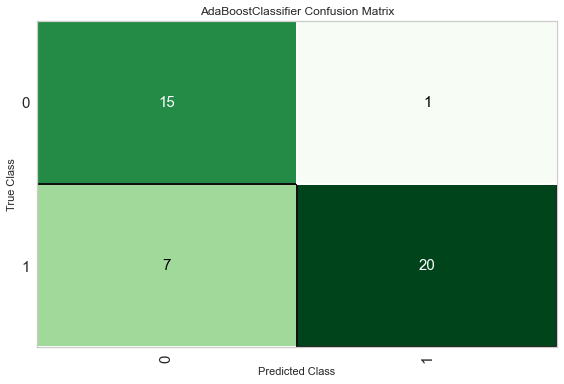

In [31]:
# plotting the confusion matrix
# false positives seem much lower than false negatives
plot_model(boosted_et, plot = 'confusion_matrix')

In [32]:
# check the parameters of bagged_et
print(boosted_et)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_wei

In [33]:
# checking results for boosted ET
# test set
predict_model(boosted_et)

rightankle   leftankle   rightknee    leftknee    righthip     lefthip  rightankle leftankle  rightankle rightknee  rightankle leftknee  rightankle righthip  ...  leftknee lefthip  leftknee rightshoulder  righthip lefthip  righthip rightshoulder  righthip leftshoulder  lefthip rightshoulder  rightshoulder leftshoulder  curve  Label  Score
0   102.089996  131.229996  164.539993  167.350006  134.250000  146.179993          13397.270508          16797.888672         17084.761719         13705.582031  ...      24463.222656              851.811523      19624.664062              683.332520           10370.812500             744.056213                  393.202515      0      0   0.97
1   139.850006  140.970001  154.330002  139.619995  130.289993  130.529999          19714.654297          21583.050781         19525.857422         18221.056641  ...      18224.597656              727.420227      17006.753906              678.810913            4594.025391             680.061279                  183.704605      0      1   0.52
2   118.550003  137.389999  128.649994  140.399994  118.099998  136.610001          16287.584961          15251.457031         16644.419922         14000.754883  ...      19180.044922              419.795990      16133.640625              353.118988            6917.117188             408.463898                  175.124298      0      0   0.89
3   151.509995  151.520004  167.309998  161.929993  139.669998  143.449997          22956.794922          25349.138672         24534.013672         21161.402344  ...      23228.859375             1165.895996      20035.662109             1005.624023            5018.343262            1032.839966                  258.696014      1      1   0.82
4   138.330002  109.610001  159.309998  158.330002  140.919998  151.149994          15162.351562          22037.351562         21901.789062         19493.462891  ...      23931.580078             2740.692383      21300.058594             2439.325195            4785.643066            2616.406494                  587.847595      1      1   0.66
5   172.460007  169.949997  173.229996  179.520004  144.589996  163.850006          29309.576172          29875.246094         30960.019531         24935.992188  ...      29414.351562             2971.055908      23691.072266             2392.964600            5245.725098            2711.717529                  600.434021      1      1   0.69
6   164.160004  172.490005  178.610001  178.880005  155.449997  161.589996          28315.958984          29320.617188         29364.941406         25518.671875  ...      28905.218750             2137.615967      25119.166016             1857.627441           14161.495117            1931.000488                 1088.645020      0      0   0.65
7   168.460007  154.389999  160.970001  169.710007  137.500000  149.919998          26008.539062          27117.005859         28589.345703         23163.250000  ...      25442.923828             2350.483398      20614.000000             1904.375000            2740.375000            2076.392090                  276.030487      1      1   0.93
8   149.309998  157.419998  160.250000  157.070007  135.320007  142.020004          23504.380859          23926.927734         23452.121094         20204.628906  ...      22307.082031             2272.802979      19218.146484             1958.080444             198.920395            2055.029297                   21.270901      1      1   0.95
9   126.669998  148.270004  156.449997  152.630005  140.649994  148.880005          18781.361328          19817.521484         19333.642578         17816.134766  ...      22723.554688              793.676025      20939.972656              731.380005            1419.158447             774.176025                   52.467999      1      1   0.64
10  174.389999  178.089996  166.720001  179.289993  143.449997  161.190002          31057.115234          29074.300781         31266.382812         25016.246094  ...      28899.755859             2897.326416  

## Blending models

In [34]:
# train individual models to blend
lightgbm = create_model('lightgbm', verbose = False)
et = create_model('et', verbose = False)
rf = create_model('rf', verbose = False)

In [35]:
# blend individual models
blend_soft = blend_models(estimator_list = [lightgbm, et, rf], method = 'soft')

In [36]:
# blend individual models
blend_hard = blend_models(estimator_list = [lightgbm, et, rf], method = 'hard')

Hard blending did not give any AUC scores.

In [37]:
# blend top3 models from compare_models
blender_top3 = blend_models(top3)

In [38]:
predict_model(blender_top3);

The blended model has some overfitting on the train data, but over all AUC was exceptionally similar with comparable F1 score.

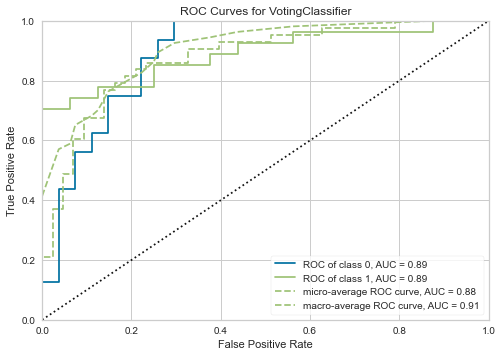

In [39]:
plot_model(blender_top3, plot = 'auc')

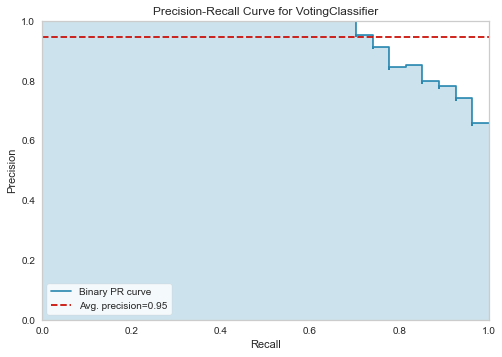

In [40]:
plot_model(blender_top3, plot = 'pr')

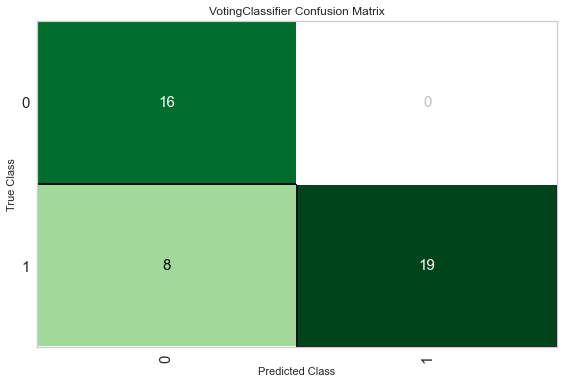

In [41]:
plot_model(blender_top3, plot = 'confusion_matrix')

In [42]:
print(blender_top3.estimators_)

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=Fa

## Trying out XGBoost model

In [43]:
X = df_in.drop(labels = ['curve'], axis = 1)
y = df_in['curve']

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [45]:
D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

In [46]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [47]:
model = xgb.train(param, D_train, steps)

[15:04:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [48]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))

Precision = 0.8473684210526315
Recall = 0.8473684210526315
Accuracy = 0.8620689655172413


## XGBoost with Gridsearch CV

In [49]:
clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, Y_train)

[15:07:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     use_label_encoder=True,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'eta': [0

In [50]:
print(grid.best_score_)

-0.4509345009391302


#### Looks like gridsearch does not work very well with this dataset and model combination

# Bagged Extra trees seemed the most stable across train and test, even achieving 100% precision for its test set

In [51]:
save_model(bagged_et,'Final Prediction Model 7 Sep 2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='curve',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                                                        min_impurity_split=None,
                                                                        min_samples_leaf=1,
                                                                        min_samples_s